In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data into memory
data_set_train = np.genfromtxt("hw03_data_set_train.csv", delimiter = ",", skip_header = 1)
data_set_test = np.genfromtxt("hw03_data_set_test.csv", delimiter = ",", skip_header = 1)

# get x and y values
x_train = data_set_train[:, 0]
y_train = data_set_train[:, 1]
x_test = data_set_test[:, 0]
y_test = data_set_test[:, 1]


In [3]:
# set drawing parameters
minimum_value = 1.6
maximum_value = 5.1
x_interval = np.arange(start = minimum_value, stop = maximum_value, step = 0.001)

In [4]:

def plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat):
    fig = plt.figure(figsize = (8, 4))
    plt.plot(x_train, y_train, "b.", markersize = 10)
    plt.plot(x_test, y_test, "r.", markersize = 10)
    plt.plot(x_interval, y_interval_hat, "k-")
    plt.xlim([1.55, 5.15])
    plt.xlabel("Time (sec)")
    plt.ylabel("Signal (millivolt)")
    plt.legend(["training", "test"])
    plt.show()
    return(fig)

In [5]:
# STEP 3
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def regressogram(x_query, x_train, y_train, left_borders, right_borders):
    # your implementation starts below
    y_hat = np.zeros(len(x_query))

    for point in range(len(x_query)):
        for i in range(len(left_borders)):
            if x_query[point] >= left_borders[i] and x_query[point] < right_borders[i]:
                y_hat[point] = np.mean(y_train[(x_train > left_borders[i]) & (x_train <= right_borders[i])])

            

    # your implementation ends above
    return(y_hat)

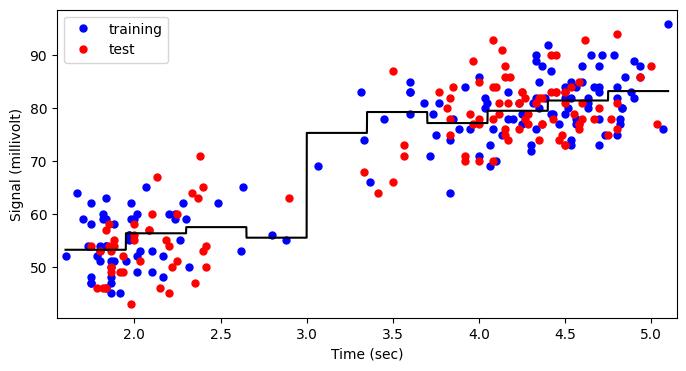

Regressogram => RMSE is 5.96665297472927 when h is 0.35


In [6]:
bin_width = 0.35
left_borders = np.arange(start = minimum_value, stop = maximum_value, step = bin_width)
right_borders = np.arange(start = minimum_value + bin_width, stop = maximum_value + bin_width, step = bin_width)

y_interval_hat = regressogram(x_interval, x_train, y_train, left_borders, right_borders)
fig = plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat)
fig.savefig("regressogram.pdf", bbox_inches = "tight")

y_test_hat = regressogram(x_test, x_train, y_train, left_borders, right_borders)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("Regressogram => RMSE is {} when h is {}".format(rmse, bin_width))



In [7]:
# STEP 4
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def running_mean_smoother(x_query, x_train, y_train, bin_width):
    # your implementation starts below

    y_hat = np.zeros(len(x_query))

    for point in range(len(x_query)):
        y_hat[point] = np.mean(y_train[(x_train >= x_query[point] - bin_width/2) & (x_train < x_query[point] + bin_width/2)])

    
    
    # your implementation ends above
    return(y_hat)

bin_width = 0.35

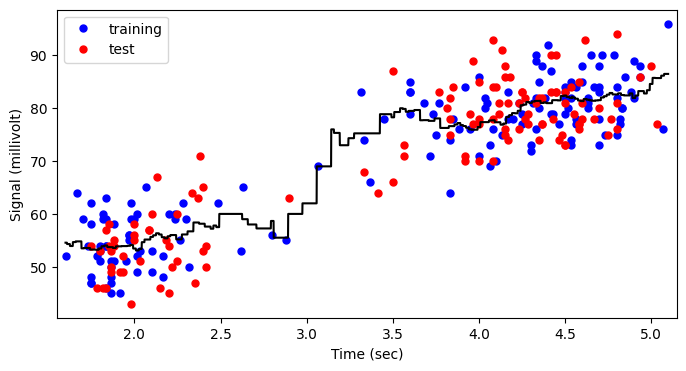

Running Mean Smoother => RMSE is 6.093996956866121 when h is 0.35


In [8]:
bin_width = 0.35

y_interval_hat = running_mean_smoother(x_interval, x_train, y_train, bin_width)
fig = plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat)
fig.savefig("running_mean_smoother.pdf", bbox_inches = "tight")

y_test_hat = running_mean_smoother(x_test, x_train, y_train, bin_width)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("Running Mean Smoother => RMSE is {} when h is {}".format(rmse, bin_width))


In [9]:

# STEP 5
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def kernel_smoother(x_query, x_train, y_train, bin_width):
    # your implementation starts below

    y_hat = np.zeros(len(x_query))

    for point in range(len(x_query)):
        y_hat[point] = np.sum(y_train * np.exp(-(x_train - x_query[point])**2 / (2 * bin_width**2))) / np.sum(np.exp(-(x_train - x_query[point])**2 / (2 * bin_width**2)))

    
    
    # your implementation ends above
    return(y_hat)

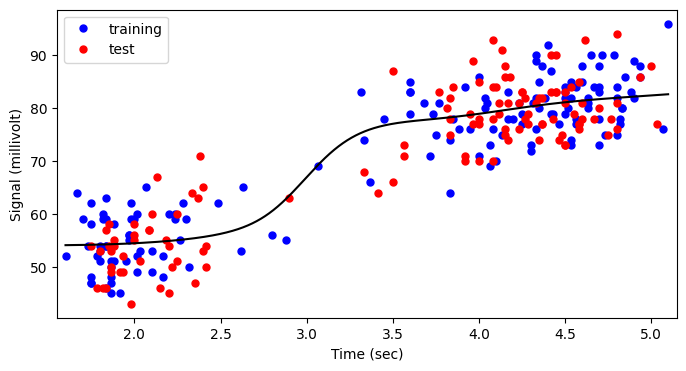

Kernel Smoother => RMSE is 5.878151726515408 when h is 0.35


In [10]:
bin_width = 0.35

y_interval_hat = kernel_smoother(x_interval, x_train, y_train, bin_width)
fig = plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat)
fig.savefig("kernel_smoother.pdf", bbox_inches = "tight")

y_test_hat = kernel_smoother(x_test, x_train, y_train, bin_width)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("Kernel Smoother => RMSE is {} when h is {}".format(rmse, bin_width))
